In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Prepare the data
# data = {
#     'Model': ['gpt2-small', 'gpt2-large', 'gpt2-small', 'gpt2-xl', 'gpt2-xl', 'gpt2-medium',
#               'gpt2-small', 'gpt2-xl', 'gpt2-small', 'gpt2-xl', 'gpt2-small', 'gpt2-medium',
#               'gpt2-medium', 'gpt2-xl', 'gpt2-small', 'gpt2-medium', 'gpt2-xl', 'gpt2-medium',
#               'gpt2-large', 'gpt2-large', 'gpt2-large', 'gpt2-medium', 'gpt2-large', 'gpt2-large'],
#     'Embedding_Dimension': [768, 1280, 768, 1600, 1600, 1024, 768, 1600, 768, 1600, 768, 1024,
#                             1024, 1600, 768, 1024, 1600, 1024, 1280, 1280, 1280, 1024, 1280, 1280],
#     'Context_Length': [128, 256, 1024, 128, 1024, 128, 2048, 256, 512, 512, 256, 2048,
#                        512, 2048, 4096, 256, 4096, 4096, 2048, 1024, 4096, 1024, 512, 128],
#     'Attention_Percentage': [0.2998, 0.2081, 0.6076, 0.1444, 0.3983, 0.2459, 0.7328, 0.1444,
#                              0.4527, 0.2511, 0.2998, 0.6956, 0.3901, 0.5633, 0.8170, 0.2459,
#                              0.7105, 0.8000, 0.6584, 0.5031, 0.7786, 0.5517, 0.3417, 0.2081]
# }





In [58]:
import re

def extract_data(file_path):
    with open(file_path, 'r') as file:
        text = file.read()

    pattern = r"Total Attention Cycles: (\d+)\nTotal Compute Cycles: (\d+)\nAttention %: ([\d.]+)\nModel Name and Parameters ([\w-]+)\((\d+)M\)\nEmbeddding Dimension: (\d+)\nNumber of Heads: (\d+)\nContext Length (\d+)\nConfiguration: ([\w-]+)\((\d+)M\)_(\d+)_(\d+)_(\d+)"

    matches = re.findall(pattern, text)

    data = {
        'Model': [],
        'Embedding_Dimension': [],
        'Context_Length': [],
        'Attention_Percentage': []
    }

    for match in matches:
        model_name = match[3]
        embedding_dim = int(match[5])
        context_length = int(match[7])
        attention_percentage = round(float(match[2]), 4)

        data['Model'].append(model_name)
        data['Embedding_Dimension'].append(embedding_dim)
        data['Context_Length'].append(context_length)
        data['Attention_Percentage'].append(attention_percentage)

    return data

# Specify the path to your input file
file_path = '/content/attention_only_analysis.txt'

# Extract data from the file


In [59]:
df = pd.DataFrame(data)

In [60]:
df

,Model,Embedding_Dimension,Context_Length,Attention_Percentage
0,gpt2-small,768,128,0.2998
1,gpt2-large,1280,256,0.2081
2,gpt2-small,768,1024,0.6076
3,gpt2-xl,1600,128,0.1444
4,gpt2-xl,1600,1024,0.3983
5,gpt2-medium,1024,128,0.2459
6,gpt2-small,768,2048,0.7328
7,gpt2-xl,1600,256,0.1444
8,gpt2-small,768,512,0.4527
9,gpt2-xl,1600,512,0.2511


In [61]:
df = df.sort_values('Attention_Percentage', ascending=True)

# Display the sorted DataFrame


In [62]:
fig = px.scatter_3d(df, x='Embedding_Dimension', y='Context_Length', z='Attention_Percentage',
                    color='Model', size='Attention_Percentage',
                    labels={'Attention_Percentage': 'Attention %'},
                    title='3D Scatter Plot of Attention %, Embedding Dimension, and Context Length')
fig.show()


In [63]:
fig = px.scatter(df, x='Embedding_Dimension', y='Context_Length',
                 size='Attention_Percentage', color='Model',
                 labels={'Attention_Percentage': 'Attention %'},
                 title='Bubble Chart of Attention %, Embedding Dimension, and Context Length')
fig.show()


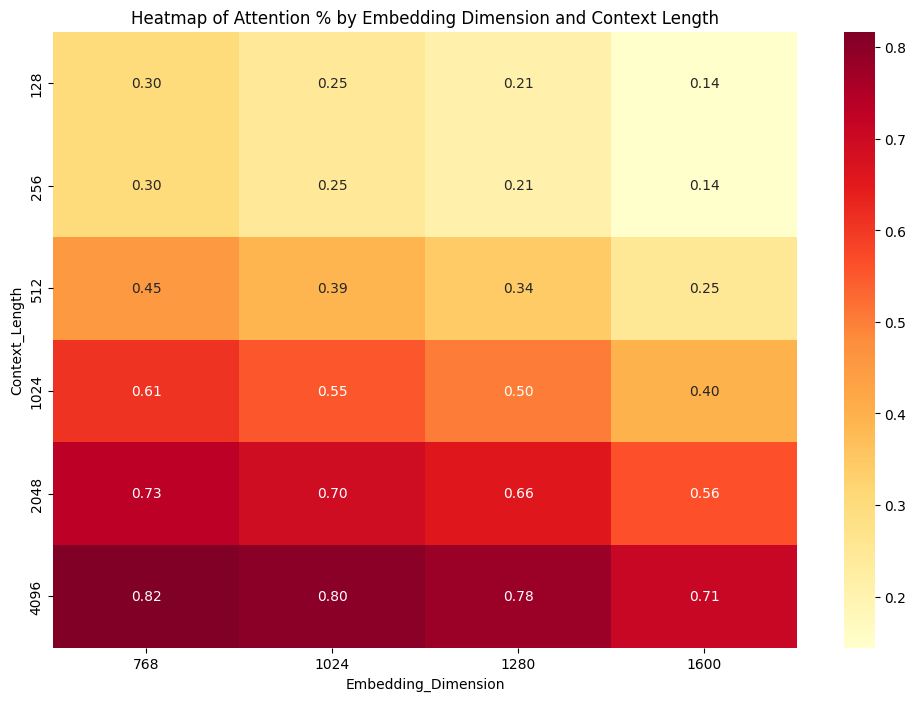

In [64]:
plt.figure(figsize=(12, 8))
pivot = df.pivot(index='Context_Length', columns='Embedding_Dimension', values='Attention_Percentage')
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Heatmap of Attention % by Embedding Dimension and Context Length')
plt.show()


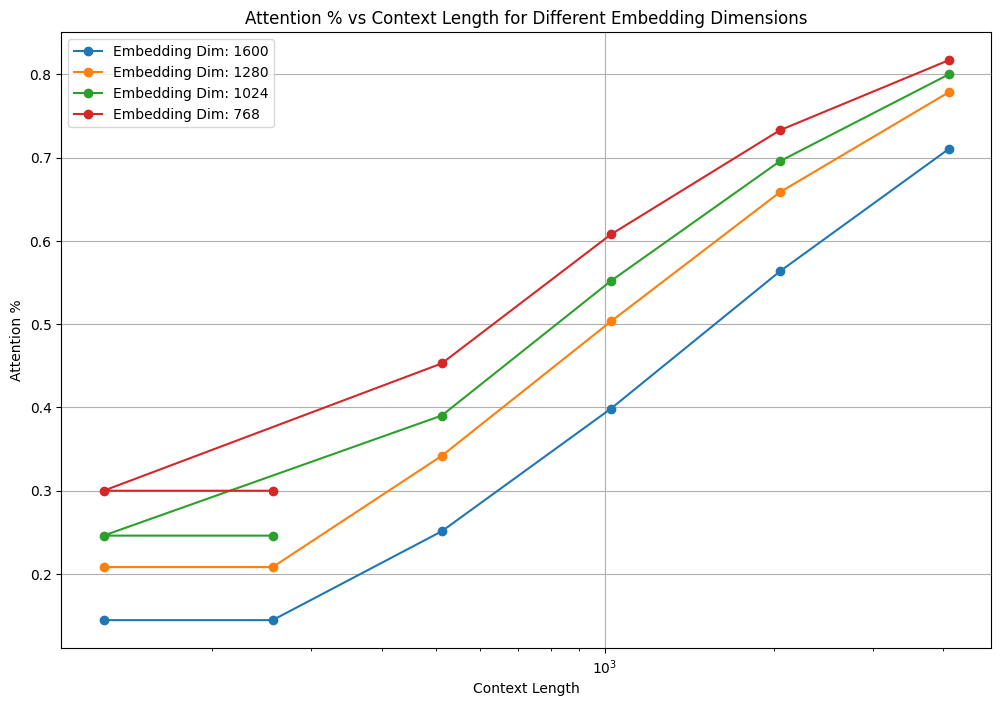

In [65]:
plt.figure(figsize=(12, 8))
for dim in df['Embedding_Dimension'].unique():
    subset = df[df['Embedding_Dimension'] == dim]
    plt.plot(subset['Context_Length'], subset['Attention_Percentage'],
             label=f'Embedding Dim: {dim}', marker='o')
plt.xlabel('Context Length')
plt.ylabel('Attention %')
plt.title('Attention % vs Context Length for Different Embedding Dimensions')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()


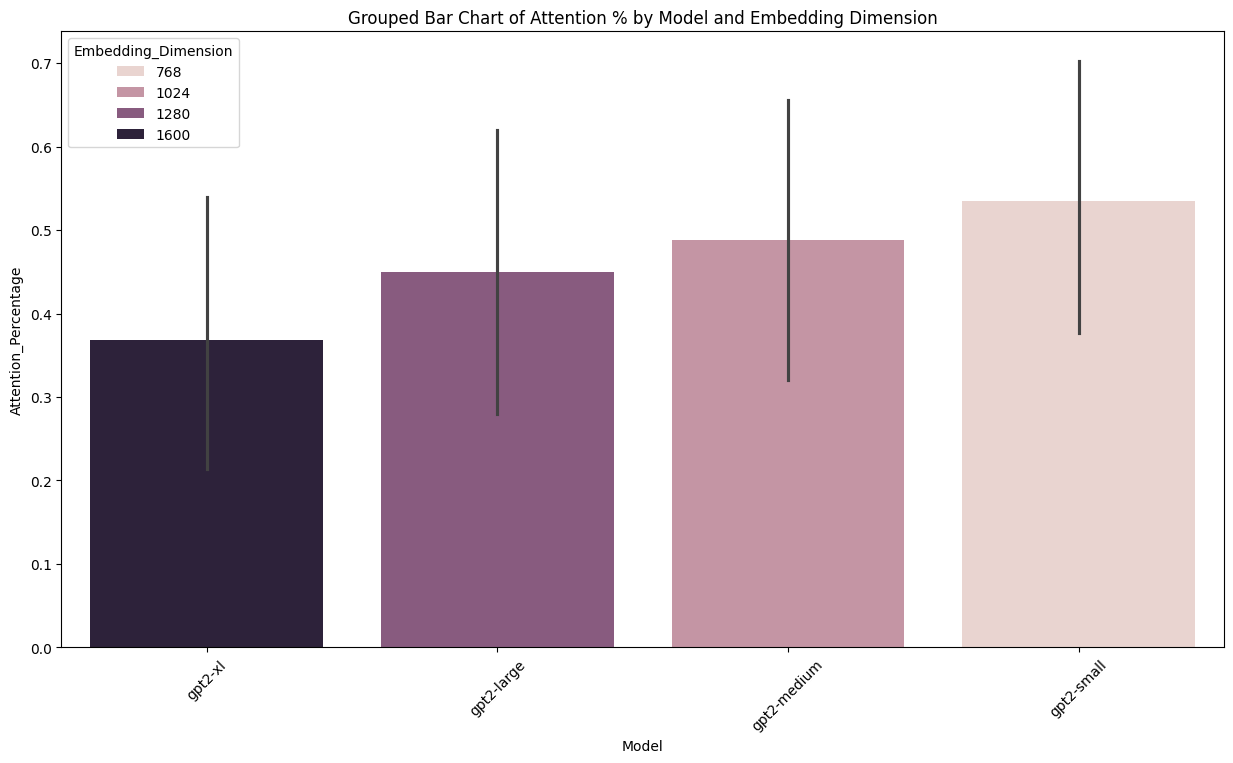

In [66]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Attention_Percentage', hue='Embedding_Dimension', data=df)
plt.title('Grouped Bar Chart of Attention % by Model and Embedding Dimension')
plt.xticks(rotation=45)
plt.show()


In [67]:
df['Model'] = df['Model'].astype('category')
df['Model_code'] = df['Model'].cat.codes

# Create the parallel coordinates plot
fig = px.parallel_coordinates(df,
                              dimensions=['Attention_Percentage', 'Embedding_Dimension', 'Context_Length'],
                              color='Model_code',
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              labels={'Attention_Percentage': 'Attention %',
                                      'Embedding_Dimension': 'Embedding Dim',
                                      'Context_Length': 'Context Len',
                                      'Model_code': 'Model'},
                              title='Parallel Coordinates Plot of Model Configurations')
fig.show()